In [1]:
import numpy as np

n_s = 3.46
n_v = 1.0
theta = np.pi / 4
a = 7.29735e-3
sigma_xx = 0  # in the unit of e^2/h
sigma_xy = 1  # in the unit of e^2/h

c1 = n_v * np.cos(theta)
c2 = np.sqrt(n_s**2 - n_v**2 * np.sin(theta)**2)
c3 = n_v / np.cos(theta)
c4 = n_s**2 / c2
c5 = 2 * a * sigma_xx
c6 = 2 * a * sigma_xy

I = np.eye(2)

T_s = np.array([
    [2 * c1 / (c1 + c2), 0],
    [0, 2 * c3 / (c3 + c4)]])

R_s = I - T_s

T_f = np.array([
    [2 * c2 * (c4 + c3 + c5) / ((c1 + c2 + c5) * (c3 + c4 + c5) + c6**2), -2 * c6 * c4 / ((c1 + c2 + c5) * (c3 + c4 + c5) + c6**2)],
    [2 * c6 * c2 / ((c1 + c2 + c5) * (c3 + c4 + c5) + c6**2), 2 * c4 * (c2 + c1 + c5) / ((c1 + c2 + c5) * (c3 + c4 + c5) + c6**2)]])

R_f = T_f - I

E_incident = np.array([1.0, 0.01 * np.cos(theta)])  # initial polarization
E_1 = T_f @ T_s @ E_incident
E_2 = T_f @ R_s @ R_f @ T_s @ E_incident

E_1x = E_1[0]
E_1y = E_1[1]
E_2x = E_2[0]
E_2y = E_2[1]

theta_1 = np.arctan(E_1y / (E_1x * np.cos(theta)))
theta_2 = np.arctan(E_2y / (E_2x * np.cos(theta)))

print(theta_1)
print(theta_2)


0.01845390640584134
0.01624904991856329


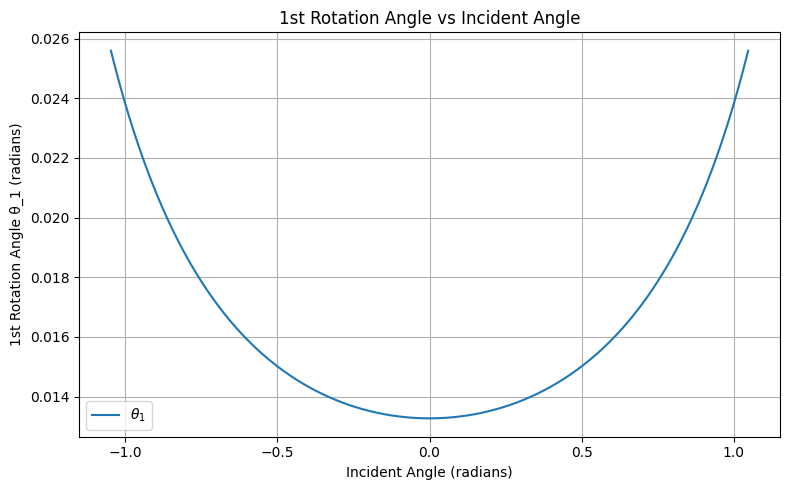

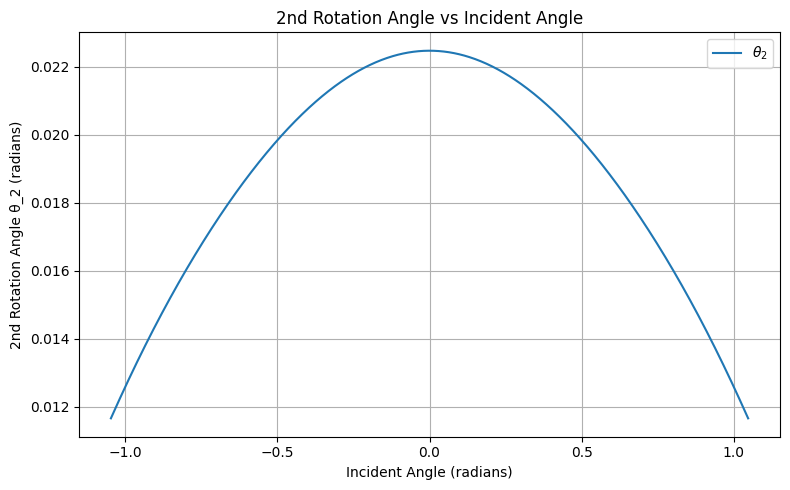

In [21]:
import numpy as np
import matplotlib.pyplot as plt

n_s = 3.46
n_v = 1.0
a = 7.29735e-3
sigma_xx = 0  # in the unit of e^2/h
sigma_xy = 1  # in the unit of e^2/h (upper & bottom combined)
I = np.eye(2)

theta_range = np.linspace(-np.pi / 3, np.pi / 3, 1000)
theta_1_list = []
theta_2_list = []

for theta in theta_range:
    c1 = n_v * np.cos(theta)
    c2 = np.sqrt(n_s**2 - n_v**2 * np.sin(theta)**2)
    c3 = n_v / np.cos(theta)
    c4 = n_s**2 / c2
    c5 = 2 * a * sigma_xx
    c6 = 2 * a * sigma_xy

    T_s = np.array([
        [2 * c1 / (c1 + c2), 0],
        [0, 2 * c3 / (c3 + c4)]])

    R_s = I - T_s

    T_f = np.array([
        [2 * c2 * (c4 + c3 + c5) / ((c1 + c2 + c5) * (c3 + c4 + c5) + c6**2), -2 * c6 * c4 / ((c1 + c2 + c5) * (c3 + c4 + c5) + c6**2)],
        [2 * c6 * c2 / ((c1 + c2 + c5) * (c3 + c4 + c5) + c6**2), 2 * c4 * (c2 + c1 + c5) / ((c1 + c2 + c5) * (c3 + c4 + c5) + c6**2)]])

    R_f = T_f - I

    E_incident = np.array([1.0, 0.01 * np.cos(theta)])
    E_1 = T_f @ T_s @ E_incident
    E_2 = T_f @ R_s @ R_f @ T_s @ E_incident

    E_1x = E_1[0]
    E_1y = E_1[1]
    E_2x = E_2[0]
    E_2y = E_2[1]

    theta_1 = np.arctan(E_1y / (E_1x * np.cos(theta)))
    theta_2 = np.arctan(E_2y / (E_2x * np.cos(theta)))

    theta_1_list.append(theta_1)
    theta_2_list.append(theta_2)

plt.figure(figsize=(8, 5))
plt.plot(theta_range, theta_1_list, label=r'$\theta_1$')
plt.xlabel("Incident Angle (radians)")
plt.ylabel("1st Rotation Angle θ_1 (radians)")
plt.title("1st Rotation Angle vs Incident Angle")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(theta_range, theta_2_list, label=r'$\theta_2$')
plt.xlabel("Incident Angle (radians)")
plt.ylabel("2nd Rotation Angle θ_2 (radians)")
plt.title("2nd Rotation Angle vs Incident Angle")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


<>:85: SyntaxWarning: invalid escape sequence '\s'
<>:86: SyntaxWarning: invalid escape sequence '\s'
<>:85: SyntaxWarning: invalid escape sequence '\s'
<>:86: SyntaxWarning: invalid escape sequence '\s'
C:\Users\10242\AppData\Local\Temp\ipykernel_16372\1465320527.py:85: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("$\sigma_{xy}$ ($e^2/h$)")
C:\Users\10242\AppData\Local\Temp\ipykernel_16372\1465320527.py:86: SyntaxWarning: invalid escape sequence '\s'
  plt.title("$\sigma_{xy}$ vs Incident Angle")


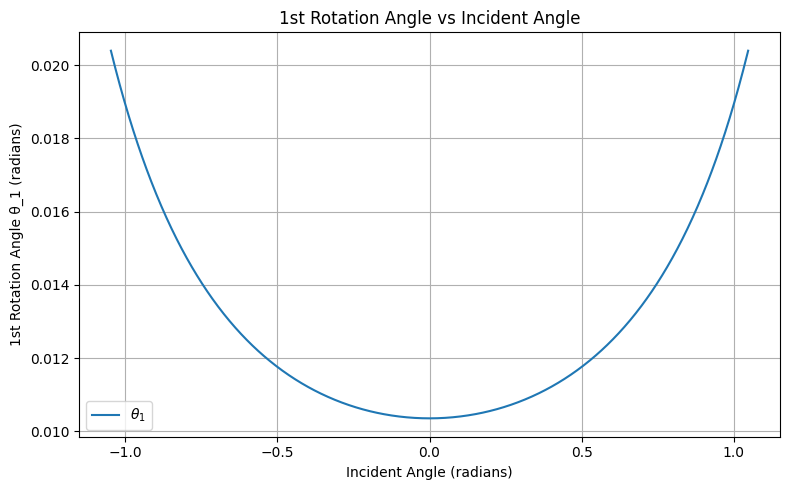

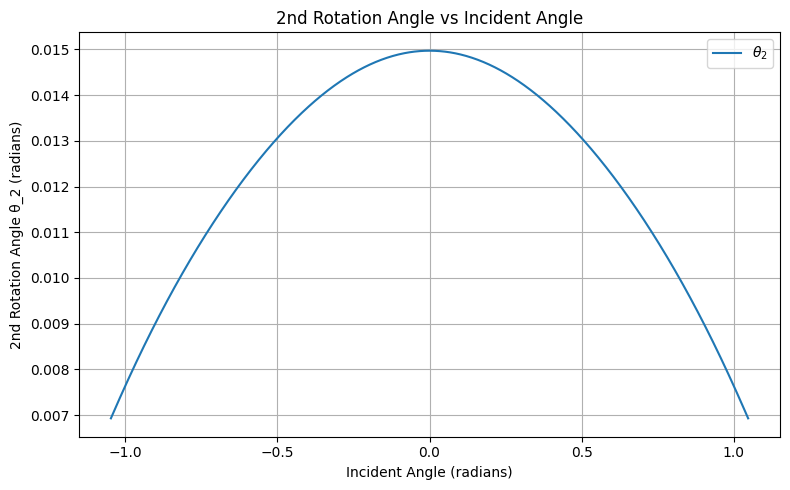

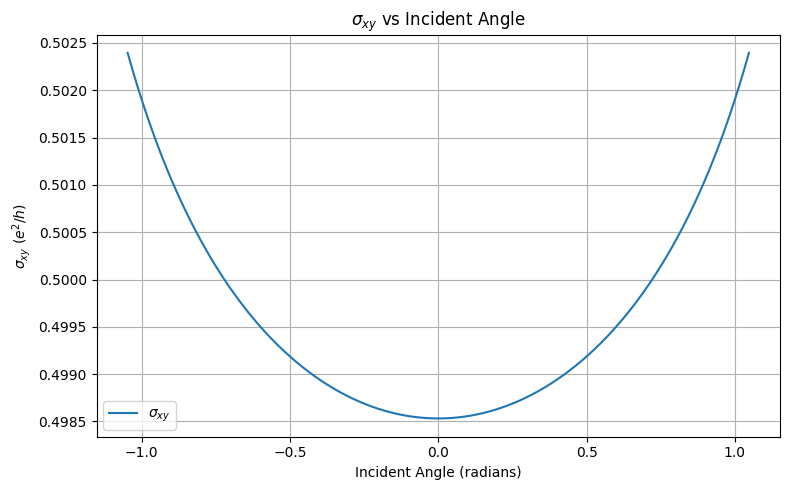

In [30]:
import numpy as np
import matplotlib.pyplot as plt

n_s = 3.46
n_v = 1.0
a = 7.29735e-3
sigma_xx = 0.9  # in the unit of e^2/h
sigma_xy = 0.5  # in the unit of e^2/h (upper & bottom combined)
I = np.eye(2)
k = np.pi / 360 # 0.5 degree

theta_range = np.linspace(-np.pi / 3, np.pi / 3, 1000)
theta_1_list = []
theta_2_list = []
sigma_list = []

for theta in theta_range:
    c1 = n_v * np.cos(theta)
    c2 = np.sqrt(n_s**2 - n_v**2 * np.sin(theta)**2)
    c3 = n_v / np.cos(theta)
    c4 = n_s**2 / c2
    c5 = 2 * a * sigma_xx
    c6 = 2 * a * sigma_xy
    c7 = c2 * n_v / n_s
    c8 = c1 * n_s / n_v

    T_s = np.array([
        [2 * c1 / (c1 + c2), 0],
        [0, 2 * c3 / (c3 + c4)]])

    R_s = I - T_s

    T_f = np.array([
        [2 * c2 * (c4 + c3 + c5) / ((c1 + c2 + c5) * (c3 + c4 + c5) + c6**2), -2 * c6 * c4 / ((c1 + c2 + c5) * (c3 + c4 + c5) + c6**2)],
        [2 * c6 * c2 / ((c1 + c2 + c5) * (c3 + c4 + c5) + c6**2), 2 * c4 * (c2 + c1 + c5) / ((c1 + c2 + c5) * (c3 + c4 + c5) + c6**2)]])

    R_f = T_f - I

    E_incident = np.array([1.0, k * np.cos(theta)])
    E_0 = T_s @ E_incident
    E_1 = T_f @ T_s @ E_incident
    E_2 = T_f @ R_s @ R_f @ T_s @ E_incident

    E_0x = E_0[0]
    E_0y = E_0[1]
    E_1x = E_1[0]
    E_1y = E_1[1]
    E_2x = E_2[0]
    E_2y = E_2[1]

    theta_1 = np.arctan(E_1y / (E_1x * np.cos(theta)))
    theta_2 = np.arctan(E_2y / (E_2x * np.cos(theta)))

    theta_1_list.append(theta_1)
    theta_2_list.append(theta_2)

    x_1 = 2 * (E_0x * c2 + E_0y * c4 * np.cos(theta) * np.tan(theta_1)) / (c1 + c2 + (c3 + c4) * np.cos(theta)**2 * np.tan(theta_1)**2)
    x_2 = x_1 * np.cos(theta) * np.tan(theta_1)
    sigma = n_v * np.tan(theta_1) - c4 * (2 * E_0y - x_2) / x_1
    sigma_list.append(sigma / (2 * a))

plt.figure(figsize=(8, 5))
plt.plot(theta_range, theta_1_list, label=r'$\theta_1$')
plt.xlabel("Incident Angle (radians)")
plt.ylabel("1st Rotation Angle θ_1 (radians)")
plt.title("1st Rotation Angle vs Incident Angle")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(theta_range, theta_2_list, label=r'$\theta_2$')
plt.xlabel("Incident Angle (radians)")
plt.ylabel("2nd Rotation Angle θ_2 (radians)")
plt.title("2nd Rotation Angle vs Incident Angle")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(theta_range, sigma_list, label=r'$\sigma_{xy}$')
plt.xlabel("Incident Angle (radians)")
plt.ylabel("$\sigma_{xy}$ ($e^2/h$)")
plt.title("$\sigma_{xy}$ vs Incident Angle")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
